In [88]:
import pandas as pd
from tqdm import tqdm
import joblib
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

## DATA READING

In [89]:
df = pd.read_csv('survey.csv')
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## REMOVING NULL VALUES, DUPLICATES AND UNNECESSARY COLUMNS

In [90]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [91]:
df.drop(['state' , 'comments', 'self_employed','Timestamp','Country'] , axis = 1 , inplace=True)

In [92]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [93]:
df['work_interfere'].fillna('NaN', inplace=True)

In [94]:
df.isna().sum()

Age                          0
Gender                       0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [95]:
df.duplicated().sum()

4

In [96]:
df.drop_duplicates(inplace=True)

## DATA CLEANING

In [97]:
df['Gender'] = df['Gender'].str.lower()

In [98]:
df['Gender'].value_counts()

male                                              818
female                                            183
m                                                 149
f                                                  53
woman                                               4
make                                                4
male                                                3
cis male                                            3
female                                              2
man                                                 2
female (trans)                                      2
neuter                                              1
male leaning androgynous                            1
trans woman                                         1
msle                                                1
female (cis)                                        1
queer                                               1
cis-female/femme                                    1
mail                        

In [99]:
gender_mapping = {
    'male': 'Male',
    'm': 'Male',
    'man': 'Male',
    'cis male': 'Male',
    'msle': 'Male',
    'malr': 'Male',
    'make': 'Male',
    'mail': 'Male',
    'ostensibly male, unsure what that really means': 'Male',
    'female': 'Female',
    'f': 'Female',
    'woman': 'Female',
    'female (trans)': 'Other',
    'female (cis)': 'Female',
    'femail': 'Female',
    'cis-female/femme': 'Female',
    'cis man': 'Male',
    'male leaning androgynous': 'Male',
    'neuter': 'Other',
    'trans woman': 'Other',
    'queer': 'Other',
    'a little about you': 'Other',
    'p': 'Other',
    'guy (-ish) ^_^': 'Other',
    'all': 'Other',
    'enby': 'Other',
    'fluid': 'Other'
}


In [100]:
df['Gender'] = df['Gender'].map(gender_mapping)

In [101]:
df

,Age,Gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,Rarely,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,Yes,NaN,26-100,No,Yes,No,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,No,No,NaN,100-500,Yes,Yes,No,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [102]:
num = df.select_dtypes(exclude = 'O')

In [103]:
num

,Age
0,37
1,44
2,32
3,31
4,31
...,...
1254,26
1255,32
1256,34
1257,46


In [104]:
df.drop(['Age'], inplace=True , axis = 1)

## ONE HOT ENCODING

In [105]:
df = pd.get_dummies(df , drop_first=True)

In [106]:
df = pd.concat([df , num] , axis=1)

## OUTLIER REMOVAL

In [107]:
df.drop(df[(df['Age']<18) | (df['Age']>100)]['Age'].index , inplace=True) # Removed the values less than 18 and greater than 100

In [108]:
y = df[['treatment_Yes']]

In [109]:
x = df.drop(['treatment_Yes'], axis = 1)

## TRAIN TEST SPLIT

In [110]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [111]:
x_train.shape , y_train.shape

((997, 44), (997, 1))

In [112]:
x_test.shape , y_test.shape

((250, 44), (250, 1))

## SCALING

In [113]:
scaler = MinMaxScaler()

In [114]:
x_train[['Age']] = scaler.fit_transform(x_train[['Age']])

In [115]:
x_test[['Age']] = scaler.transform(x_test[['Age']])

## MACHINE LEARNING MODELS

In [116]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [117]:
xgbc = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lg   = LogisticRegression()
dt   = DecisionTreeClassifier()
rdf  = RandomForestClassifier()
adb  = AdaBoostClassifier()
knn  = KNeighborsClassifier()
svm = SVC(gamma='auto')

In [118]:
ml_algorithms = {
    xgbc:"XGB Classifier",
    lg:"Logistic Regression",
    dt:"Decision Tree",
    rdf:"Random Forest Classifier",
    adb:"AdaBoost Classifier",
    knn:"KNN",
    svm:"SVM"
}

In [119]:
# Function to train the model
def train_model(train_data,test_data,models):
    train_history  = {"Algorithm":[],"Train_score":[],"Test_score":[],"Difference":[]}
    for model in tqdm(models.keys()):
        print(f"{models[model]} model training started!")

        # Training the model
        model.fit(train_data[0],train_data[1])

        # Getting Training and Testing score
        train_score = round(model.score(train_data[0],train_data[1]),6)*100
        test_score = round(model.score(test_data[0],test_data[1]),6)*100

        train_history['Algorithm'].append(model.__class__.__name__)
        train_history['Train_score'].append(train_score)
        train_history['Test_score'].append(test_score)
        train_history['Difference'].append(train_score - test_score)

        # Saving the model
        cwd = os.getcwd()
        model_dir = os.path.join(cwd,'models')
        os.makedirs(model_dir, exist_ok=True)
        joblib.dump(model,os.path.join(model_dir,model.__class__.__name__)+'.lb')
        print(f"{models[model]} has been trained and saved successfully!\n")

    return train_history

In [120]:
# Data to be used to train the machine learning algorithms
train_data = (x_train,y_train)
test_data = (x_test,y_test)

# Train the models and get training history

train_history = pd.DataFrame(train_model(train_data,test_data,ml_algorithms))
train_history

  0%|          | 0/7 [00:00<?, ?it/s]

XGB Classifier model training started!


 14%|█▍        | 1/7 [00:00<00:01,  3.77it/s]c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 43%|████▎     | 3/7 [00:00<00:00,  9.33it/s]

XGB Classifier has been trained and saved successfully!

Logistic Regression model training started!
Logistic Regression has been trained and saved successfully!

Decision Tree model training started!
Decision Tree has been trained and saved successfully!

Random Forest Classifier model training started!


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21124\293857633.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_data[0],train_data[1])
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 71%|███████▏  | 5/7 [00:00<00:00,  5.42it/s]

Random Forest Classifier has been trained and saved successfully!

AdaBoost Classifier model training started!
AdaBoost Classifier has been trained and saved successfully!

KNN model training started!
KNN has been trained and saved successfully!

SVM model training started!


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

SVM has been trained and saved successfully!



,Algorithm,Train_score,Test_score,Difference
0,XGBClassifier,100.0000,79.6,20.4000
1,LogisticRegression,84.4534,82.8,1.6534
2,DecisionTreeClassifier,100.0000,74.8,25.2000
3,RandomForestClassifier,100.0000,84.0,16.0000
4,AdaBoostClassifier,83.6510,84.0,-0.3490
5,KNeighborsClassifier,82.3470,71.6,10.7470
6,SVC,82.7482,84.4,-1.6518


## DEEP LEARNING MODEL

In [121]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [129]:
model = Sequential([
    Dense(units=32, input_dim=x_test.shape[1], activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=2, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001) , loss='binary_crossentropy' , metrics=['accuracy'])
model.summary()

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_89 (Dense)                │ (None, 32)             │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,153 (8.41 KB)

 Trainable params: 2,153 (8.41 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
history = model.fit(x_train , y_train, epochs=30 , validation_split=0.2 , batch_size=1)

Epoch 1/30


797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5273 - loss: 0.6909 - val_accuracy: 0.5100 - val_loss: 0.6902
Epoch 2/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5284 - loss: 0.6872 - val_accuracy: 0.5350 - val_loss: 0.6859
Epoch 3/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5479 - loss: 0.6777 - val_accuracy: 0.5250 - val_loss: 0.6796
Epoch 4/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5622 - loss: 0.6742 - val_accuracy: 0.5350 - val_loss: 0.6692
Epoch 5/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6234 - loss: 0.6459 - val_accuracy: 0.7100 - val_loss: 0.6140
Epoch 6/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7373 - loss: 0.5959 - val_accuracy: 0.6900 - val_loss: 0.5703
Epoch 7/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7302 - loss: 0.5575 - val_accuracy: 0.7300 - val_loss: 0.5416
Epoch 8/30
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7799 - loss: 0.5086 - val_accuracy: 0.7550 - val_

In [131]:
model.save('models\ANN.h5')

In [132]:
prob = model.predict(x_test)
pred = (prob>0.5).astype(int)
test_score = accuracy_score(pred , y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [133]:
train_score = pd.DataFrame(history.history).iloc[29]['accuracy']
difference = train_score - test_score
train_history = train_history.append({'Algorithm':"Neural Network",
                    'Train_score':train_score*100,
                	'Test_score':test_score*100,
                    'Difference': difference
                    }, ignore_index=True)
train_history

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21124\480885892.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_history = train_history.append({'Algorithm':"Neural Network",


,Algorithm,Train_score,Test_score,Difference
0,XGBClassifier,100.000000,79.6,20.40000
1,LogisticRegression,84.453400,82.8,1.65340
2,DecisionTreeClassifier,100.000000,74.8,25.20000
3,RandomForestClassifier,100.000000,84.0,16.00000
4,AdaBoostClassifier,83.651000,84.0,-0.34900
5,KNeighborsClassifier,82.347000,71.6,10.74700
6,SVC,82.748200,84.4,-1.65180
7,Neural Network,87.202007,81.2,0.06002


## ANALYSIS

In [134]:
train_history = train_history.sort_values(by='Test_score', ascending=False)

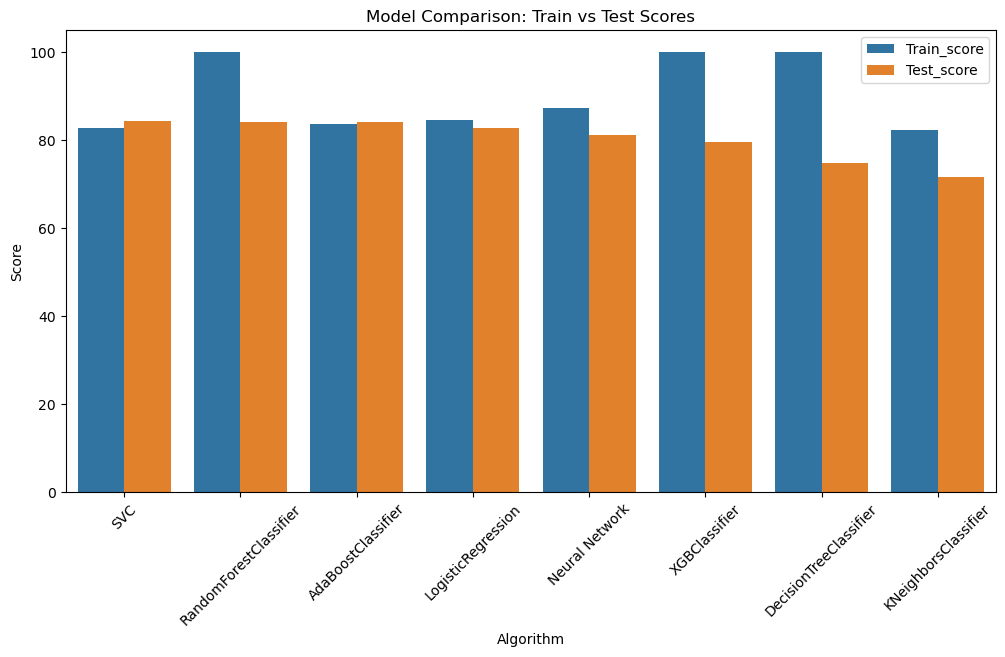

In [135]:
plt.figure(figsize=(12, 6))
train_scores = train_history.melt(id_vars='Algorithm', value_vars=['Train_score', 'Test_score'], var_name='Score Type', value_name='Score')
sns.barplot(x='Algorithm', y='Score', hue='Score Type', data=train_scores)
plt.title('Model Comparison: Train vs Test Scores')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()